In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv',sep=';')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


I keep only quantitative variable for this comparaison.

In [15]:
var_selected = [ 'Rainfall', 'Evaporation', 'Sunshine','Humidity9am','Humidity3pm',
                'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm','RainToday','RainTomorrow','Date']

In [16]:
df_selected = df[var_selected]
df_selected

,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Date
0,0.6,NaN,NaN,71.0,22.0,1007.1,8.0,NaN,21.8,No,No,01/12/2008
1,0.0,NaN,NaN,44.0,25.0,1007.8,NaN,NaN,24.3,No,No,02/12/2008
2,0.0,NaN,NaN,38.0,30.0,1008.7,NaN,2.0,23.2,No,No,03/12/2008
3,0.0,NaN,NaN,45.0,16.0,1012.8,NaN,NaN,26.5,No,No,04/12/2008
4,1.0,NaN,NaN,82.0,33.0,1006.0,7.0,8.0,29.7,No,No,05/12/2008
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,NaN,NaN,51.0,24.0,1020.3,NaN,NaN,22.4,No,No,21/06/2017
145456,0.0,NaN,NaN,56.0,21.0,1019.1,NaN,NaN,24.5,No,No,22/06/2017
145457,0.0,NaN,NaN,53.0,24.0,1016.8,NaN,NaN,26.1,No,No,23/06/2017
145458,0.0,NaN,NaN,51.0,24.0,1016.5,3.0,2.0,26.0,No,No,24/06/2017


Because of the RAM memory limit, I'll keep 2016 for this test.

In [17]:
df_selected['Year']=pd.to_datetime(df_selected['Date']).dt.year


C:\Users\JINGYI~1\AppData\Local\Temp/ipykernel_10268/2190354078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year']=pd.to_datetime(df_selected['Date']).dt.year


In [18]:
df=df_selected[(df_selected['Year']==2016)]

In [26]:
df = df.drop(columns='Date', axis=1)
df

,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year
2498,0.0,NaN,NaN,46.0,17.0,1009.2,7.0,3.0,36.7,No,No,2016
2499,0.4,NaN,NaN,54.0,30.0,1008.4,8.0,8.0,31.7,No,Yes,2016
2500,2.2,NaN,NaN,62.0,67.0,1014.8,8.0,8.0,19.5,Yes,Yes,2016
2501,15.6,NaN,NaN,74.0,65.0,1016.5,8.0,8.0,21.6,Yes,Yes,2016
2502,6.8,NaN,NaN,92.0,63.0,1013.9,8.0,8.0,22.2,Yes,No,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
145279,63.8,NaN,NaN,77.0,41.0,995.2,4.0,2.0,33.5,Yes,No,2016
145280,0.0,NaN,NaN,63.0,39.0,998.8,NaN,NaN,34.0,No,No,2016
145281,0.0,NaN,NaN,25.0,14.0,1001.0,NaN,NaN,36.4,No,No,2016
145282,0.0,NaN,NaN,30.0,23.0,1000.9,NaN,NaN,35.1,No,No,2016


I remove missing values in the target (RainTomorrow) and RainToday, then I replace yes/no by 1/0.

In [28]:
df = df.dropna(axis=0, subset=['RainToday','RainTomorrow'])

In [29]:
df = df.replace(['No','Yes'], value = [0,1])

<AxesSubplot:>

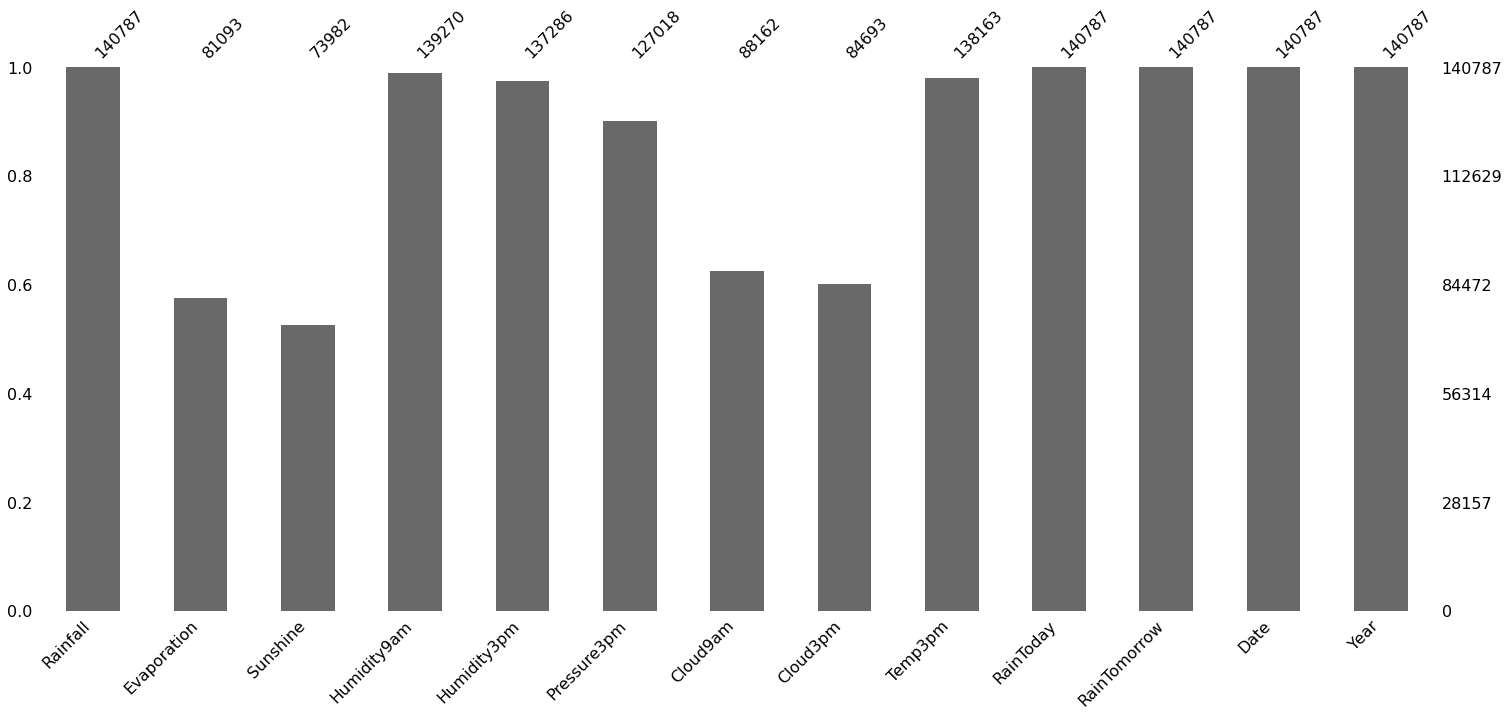

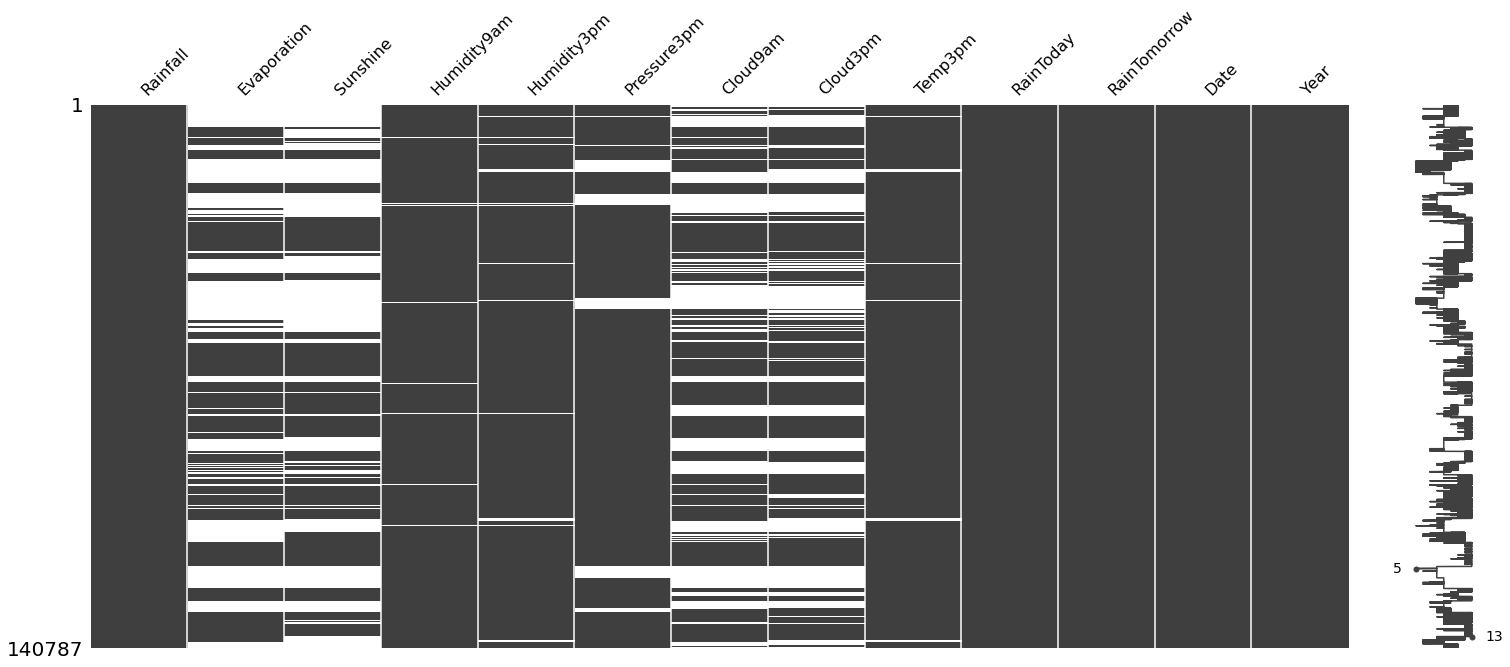

In [24]:
import missingno as msno
msno.bar(df_selected)
msno.matrix(df_selected)

<AxesSubplot:>

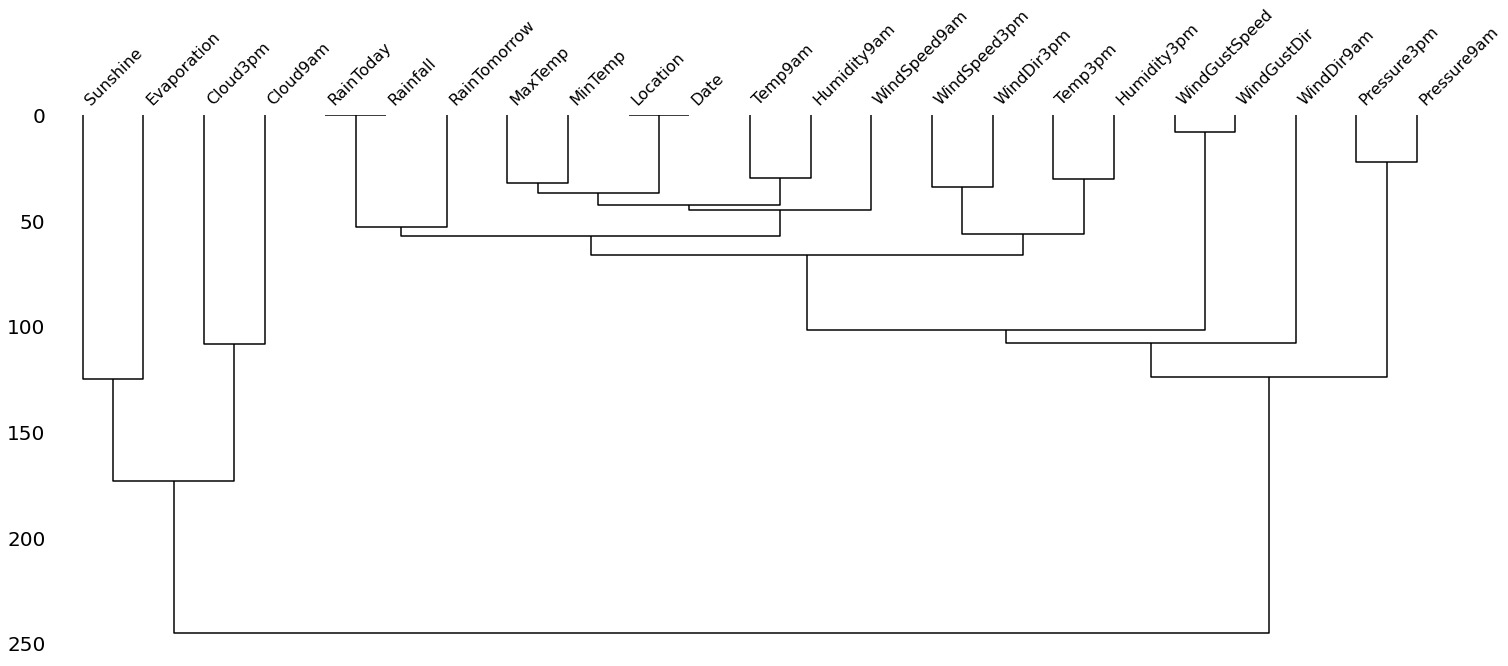

In [11]:
msno.dendrogram(df)

There is a strong correlation between the missing values of Sunshine/Evaportion and Cloud3pm/Cloud9am.

<p style="font-size: 1.5rem; color: #228ae6">Deal with missing values by KNN imputation</p>

In [20]:
from fancyimpute import KNN

In [31]:
knn_imputer = KNN()
df_knn = df.copy(deep=True)
df_knn.loc[:, :] = knn_imputer.fit_transform(df_knn)

Imputing row 1/17341 with 2 missing, elapsed time: 103.933
Imputing row 101/17341 with 3 missing, elapsed time: 104.311
Imputing row 201/17341 with 2 missing, elapsed time: 104.516
Imputing row 301/17341 with 3 missing, elapsed time: 107.293
Imputing row 401/17341 with 4 missing, elapsed time: 109.718
Imputing row 501/17341 with 4 missing, elapsed time: 109.920
Imputing row 601/17341 with 4 missing, elapsed time: 110.104
Imputing row 701/17341 with 4 missing, elapsed time: 110.259
Imputing row 801/17341 with 1 missing, elapsed time: 110.383
Imputing row 901/17341 with 4 missing, elapsed time: 110.473
Imputing row 1001/17341 with 5 missing, elapsed time: 110.604
Imputing row 1101/17341 with 2 missing, elapsed time: 110.744
Imputing row 1201/17341 with 3 missing, elapsed time: 110.893
Imputing row 1301/17341 with 2 missing, elapsed time: 111.059
Imputing row 1401/17341 with 4 missing, elapsed time: 111.259
Imputing row 1501/17341 with 4 missing, elapsed time: 111.398
Imputing row 1601/17

Imputing row 13201/17341 with 4 missing, elapsed time: 133.972
Imputing row 13301/17341 with 4 missing, elapsed time: 134.130
Imputing row 13401/17341 with 1 missing, elapsed time: 134.278
Imputing row 13501/17341 with 1 missing, elapsed time: 134.419
Imputing row 13601/17341 with 1 missing, elapsed time: 134.554
Imputing row 13701/17341 with 2 missing, elapsed time: 134.670
Imputing row 13801/17341 with 0 missing, elapsed time: 134.737
Imputing row 13901/17341 with 0 missing, elapsed time: 134.738
Imputing row 14001/17341 with 0 missing, elapsed time: 134.738
Imputing row 14101/17341 with 0 missing, elapsed time: 134.738
Imputing row 14201/17341 with 0 missing, elapsed time: 134.738
Imputing row 14301/17341 with 0 missing, elapsed time: 134.739
Imputing row 14401/17341 with 0 missing, elapsed time: 134.740
Imputing row 14501/17341 with 5 missing, elapsed time: 134.770
Imputing row 14601/17341 with 5 missing, elapsed time: 134.887
Imputing row 14701/17341 with 5 missing, elapsed time: 

In [100]:
from sklearn.impute import SimpleImputer
df_median = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy='median')
df_median.loc[:, :]= mean_imputer.fit_transform(df_median)

<p style="font-size: 1.5rem; color: #228ae6">Visualization: added data and initial data</p>

<AxesSubplot:title={'center':'KNN Imputation'}, xlabel='Evaporation', ylabel='Temp3pm'>

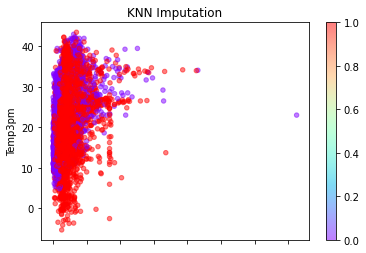

In [48]:
nullity = df['Evaporation'].isnull()+df['Temp3pm'].isnull()
df_knn.plot(x='Evaporation', y='Temp3pm',  kind='scatter', alpha=0.5,
c=nullity, cmap='rainbow', title='KNN Imputation');

<p style="font-size: 1.5rem; color: #228ae6">Deal with missing values by Median</p>

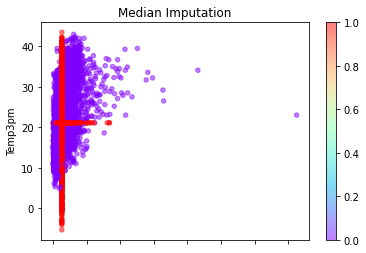

In [101]:
nullity = df['Evaporation'].isnull()+df['Temp3pm'].isnull()
df_median.plot(x='Evaporation', y='Temp3pm',  kind='scatter', alpha=0.5,
c=nullity, cmap='rainbow', title='Median Imputation');

<p style="font-size: 2rem; color: #DA2E87 ">Visually, KNN imputation represents better the distribution of data</p>

<p style="font-size: 1.5rem; color: #228ae6">Deal with missing values by dropna(), remove all missing values</p>

In [57]:
df_drop = df.dropna()

In [20]:
print ('KNN:',df_knn.shape )
print ('Median:',df_median.shape )
print ('dropna:',df_drop.shape )

KNN: (17341, 11)
Median: (17341, 11)
dropna: (4713, 11)


<p style="font-size: 1.5rem; color: #228ae6">Modelisation</p>

In [72]:
from sklearn.metrics import classification_report
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred,digits=5))
    
    return model

<p style="font-size: 1.5rem; color: #228ae6">Calcul with dataset_KNN imputation</p>

In [65]:
feature = df_knn.drop(columns=['RainTomorrow'], axis=1)
target = df_knn['RainTomorrow']

In [66]:
from sklearn.model_selection import train_test_split
X_train_knn,X_test_knn,y_train_knn,y_test_knn=train_test_split(feature,target,test_size=0.2,random_state=100)

In [67]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_knn_rs = rs.fit_transform(X_train_knn)
X_test_knn_rs = rs.transform(X_test_knn)

In [70]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm_knn, y_sm_knn = smo.fit_resample(X_train_knn_rs, y_train_knn)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm_knn).value_counts()))

Classes échantillon SMOTE : {0.0: 10607, 1.0: 10607}


In [73]:
from sklearn.linear_model import LogisticRegression

params_lr ={'C': 1, 'class_weight': 'balanced', 'solver': 'saga','max_iter':400}

model_lr = LogisticRegression(**params_lr)
model_lr = run_model(model_lr, X_sm_knn,y_sm_knn, X_test_knn_rs, y_test_knn)

              precision    recall  f1-score   support

         0.0    0.90778   0.79064   0.84517      2627
         1.0    0.53429   0.74941   0.62383       842

    accuracy                        0.78063      3469
   macro avg    0.72104   0.77002   0.73450      3469
weighted avg    0.81713   0.78063   0.79144      3469



<p style="font-size: 1.5rem; color: #228ae6">Calcul with dataset_Median imputation</p>

In [77]:
feature_med = df_median.drop(columns=['RainTomorrow'], axis=1)
target_med = df_median['RainTomorrow']
X_train_med,X_test_med,y_train_med,y_test_med=train_test_split(feature_med,target_med,test_size=0.2,random_state=100)
rs = RobustScaler()
X_train_med_rs = rs.fit_transform(X_train_med)
X_test_med_rs = rs.transform(X_test_med)
smo = SMOTE()
X_sm_med, y_sm_med = smo.fit_resample(X_train_med_rs, y_train_med)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm_med).value_counts()))

Classes échantillon SMOTE : {0.0: 10607, 1.0: 10607}


In [78]:
params_lr ={'C': 0.1, 'class_weight': 'balanced', 'solver': 'saga','max_iter':400}

model_lr = LogisticRegression(**params_lr)
model_lr = run_model(model_lr, X_sm_med,y_sm_med, X_test_med_rs, y_test_med)

              precision    recall  f1-score   support

         0.0    0.89660   0.77236   0.82986      2627
         1.0    0.50415   0.72209   0.59375       842

    accuracy                        0.76016      3469
   macro avg    0.70037   0.74723   0.71180      3469
weighted avg    0.80134   0.76016   0.77255      3469




<p style="font-size: 1.5rem; color: #228ae6">Calcul with dataset_remove all missing values </p>

In [79]:
feature_dr = df_drop.drop(columns=['RainTomorrow'], axis=1)
target_dr = df_drop['RainTomorrow']
X_train_dr,X_test_dr,y_train_dr,y_test_dr=train_test_split(feature_dr,target_dr,test_size=0.2,random_state=100)
rs = RobustScaler()
X_train_dr_rs = rs.fit_transform(X_train_dr)
X_test_dr_rs = rs.transform(X_test_dr)
smo = SMOTE()
X_sm_dr, y_sm_dr = smo.fit_resample(X_train_dr_rs, y_train_dr)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm_dr).value_counts()))

Classes échantillon SMOTE : {0: 2908, 1: 2908}


In [80]:
params_lr ={'C': 0.1, 'class_weight': 'balanced', 'solver': 'saga','max_iter':500}

model_lr = LogisticRegression(**params_lr)
model_lr = run_model(model_lr, X_sm_dr,y_sm_dr, X_test_dr_rs, y_test_dr)

              precision    recall  f1-score   support

           0    0.92034   0.77131   0.83926       704
           1    0.54391   0.80335   0.64865       239

    accuracy                        0.77943       943
   macro avg    0.73212   0.78733   0.74395       943
weighted avg    0.82493   0.77943   0.79095       943



<p style="font-size: 1.5rem; color: #228ae6">Xgboost does not require normalization, it supports missing values. So I tried xgboost model with the raw dataset (without data cleaning). </p>


In [81]:
feature_raw = df.drop(columns=['RainTomorrow'], axis=1)
target_raw = df['RainTomorrow']

In [82]:
X_train_raw,X_test_raw,y_train_raw,y_test_raw=train_test_split(feature_raw,target_raw,test_size=0.2,random_state=100)

In [85]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb = run_model(model_xgb, X_train_raw,y_train_raw, X_test_raw, y_test_raw)

              precision    recall  f1-score   support

           0    0.85730   0.91473   0.88508      2627
           1    0.66366   0.52494   0.58621       842

    accuracy                        0.82012      3469
   macro avg    0.76048   0.71984   0.73564      3469
weighted avg    0.81030   0.82012   0.81254      3469



In [95]:
print ('KNN:',df_knn.shape )
print ('Median:',df_median.shape )
print ('dropna:',df_drop.shape )

KNN: (17341, 12)
Median: (17341, 12)
dropna: (4713, 12)


In [1]:
from pandas import DataFrame
data = {'lr_dropna':[0.83,0.64], 'lr_median':[0.82,0.59],'lr_KNN':[0.84,0.62],'xgboost_raw':[0.88,0.58]}
df_result = DataFrame(data)
print ('f1_score')
print (df_result)

f1_score
   lr_dropna  lr_median  lr_KNN  xgboost_raw
0       0.83       0.82    0.84         0.88
1       0.64       0.59    0.62         0.58


<p style="font-size: 1.8rem; color: #1E3D94 ">1. Xgboost on the raw dataset (without datacleaning) got the best accuracy</p>
<p style="font-size: 1.8rem; color: #1E3D94 ">2. LogisticRegression on the dropna dataset (remove missing values directly) got the best f1 score. In addition, the dropna dataset only contains 30% data, so we can save running time</p>

<p style="font-size: 1.8rem; color: #D54D8F ">If the imputation is not suitable, there is a risk of importing noise, it could increase the running time and/or reduce the score.</p>
